# RPS-LJE explanation showcases

In [1]:
import  numpy as np
import torch
import matplotlib.pyplot as plt


In [2]:
from models.CNN.utils_cifar import load_cifar_2
train_data, test_data = load_cifar_2(use_transform=False)

Load weight matrix and intermediate prediction of tests

In [3]:
path = '../saved_models/base'
file = np.load('{}/model/saved_outputs.npz'.format(path))
intermediate_train = torch.from_numpy(file['intermediate_train'])
intermediate_test = torch.from_numpy(file['intermediate_test'])
labels_train = file['labels_train']
labels_test = file['labels_test']

pred_train = file['pred_train'].squeeze()
pred_test = file['pred_test'].squeeze()




In [4]:
weight_matrix_ours = np.load('{}/calculated_weights/ours_weight_matrix_with_lr_{}.npz'
                              .format(path,0.01), allow_pickle=True)['weight_matrix'].squeeze()
def get_ours_order(weight_matrix_ours, test_point=None):
    true_class = labels_test[test_point]
    tmp = np.dot(weight_matrix_ours,
                 intermediate_test[test_point,:]).squeeze()
    if true_class == 1:
        pos_idx = np.flip(np.argsort(tmp), axis=0)
        neg_idx = np.argsort(tmp)
    else:
        neg_idx = np.flip(np.argsort(tmp), axis=0)
        pos_idx = np.argsort(tmp)
    return pos_idx, neg_idx


## Instance-level explanation  (different samples, different explanations)
Figure 3(a)

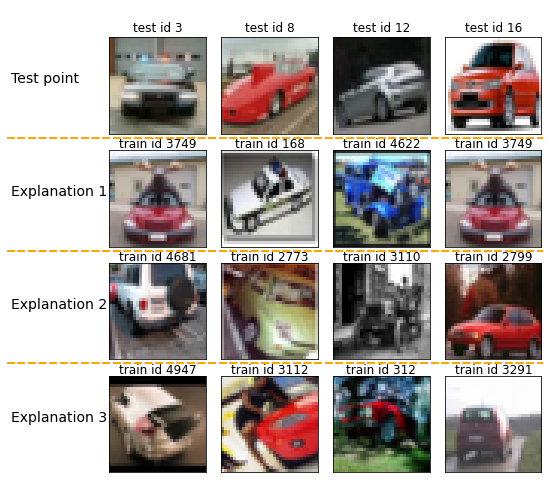

In [5]:
test_points = [3,8,12,16]
fig, ax = plt.subplots(4, 4, figsize=(8,8))
idx=0
for test_point in test_points:
    true_class = test_data[test_point][1]
    pos_idx, neg_idx = get_ours_order(weight_matrix_ours, test_point)
    k = 3
    image = test_data[test_point][0]


    ax[0,idx].imshow(image)
    ax[0,idx].set_title('\ntest id %d'%(test_point))
    ax[0,idx].set_xticks(())
    ax[0,idx].set_yticks(())
    ax[0,0].set_ylabel('Test point', fontsize=14, rotation=0, labelpad=64)

    for i in range(k):
        # Positive ones
        our_idx = pos_idx[i]

        ax[i+1, idx].imshow(train_data[our_idx][0])
        ax[i+1, idx].set_title('\ntrain id %d' % our_idx, pad=0)
        if idx ==0:
            ax[i+1, idx].set_ylabel('Explanation {}'.format(i+1),
                                    fontsize=14, rotation=0, labelpad=50)
        ax[i+1, idx].set_xticks(())
        ax[i+1, idx].set_yticks(())
        ax[i+1, idx].get_yaxis().set_visible(True)
    idx+=1
    for y in [0.705,0.51,0.315]:
        line = plt.Line2D([-0.04,0.89],[y,y],
                          color="orange",linestyle='dashed',linewidth=2)
        fig.add_artist(line)

plt.subplots_adjust(wspace=0.01,hspace=0.17)# plt.tight_layout()
plt.savefig('figs/img_show_case_class_level_ours.pdf', dpi=200, bbox_inches='tight')

## Robust explanations(same samples, same explanations)

Figure 3(b)

In [6]:
lr_list = [0.0005,0.001,0.005,0.01]
path= '../saved_models/base'
weight_matrix_ours_new = [np.load('{}/calculated_weights/ours_weight_matrix_with_lr_{}.npz'
                              .format(path,lr), allow_pickle=True)['weight_matrix']
                      for lr in lr_list]

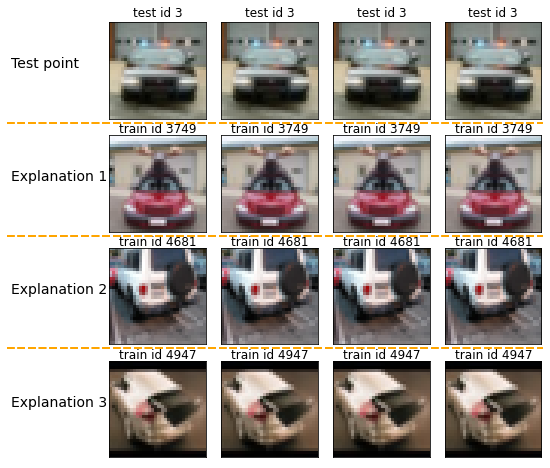

In [7]:
test_point = 3
fig, ax = plt.subplots(4, 4, figsize=(8,8))
idx=0
for weight_matrix_our_new in weight_matrix_ours_new:
    true_class = test_data[test_point][1]
    pos_idx, neg_idx = get_ours_order(weight_matrix_our_new, test_point)
    k = 3
    image = test_data[test_point][0]


    ax[0,idx].imshow(image)
    ax[0,idx].set_title('test id %d'%(test_point))
    ax[0,0].set_ylabel('Test point', fontsize=14, rotation=0, labelpad=64)
    ax[0,idx].set_xticks(())
    ax[0,idx].set_yticks(())
    for i in range(k):
        our_idx = pos_idx[i]

        ax[i+1, idx].imshow(train_data[our_idx][0])
        ax[i+1, idx].set_title('train id %d'%(our_idx), pad=0)
        ax[i+1, idx].set_xticks(())
        ax[i+1, idx].set_yticks(())
        if idx ==0:
            ax[i+1, idx].set_ylabel('Explanation {}'.format(i+1),
                                    fontsize=14, rotation=0, labelpad=50)
    idx+=1
    for y in [0.705,0.51,0.315]:
        line = plt.Line2D([-0.04,0.89],[y,y],
                          color="orange",linestyle='dashed',linewidth=2)
        fig.add_artist(line)

plt.subplots_adjust(wspace=0.01,hspace=0.17)
plt.savefig('figs/img_show_case_different_runs_ours.pdf',bbox_inches='tight', dpi=200)


## Learning rate sensitivity
Figure 7 (Appendix)

In [11]:
lr_list = [0.0005,0.001,0.005,0.01, 0.1, 1, 10,100]
path= '../saved_models/base'
weight_matrix_ours_new = [np.load('{}/calculated_weights/ours_weight_matrix_with_lr_{}.npz'
                              .format(path,lr), allow_pickle=True)['weight_matrix']
                      for lr in lr_list]

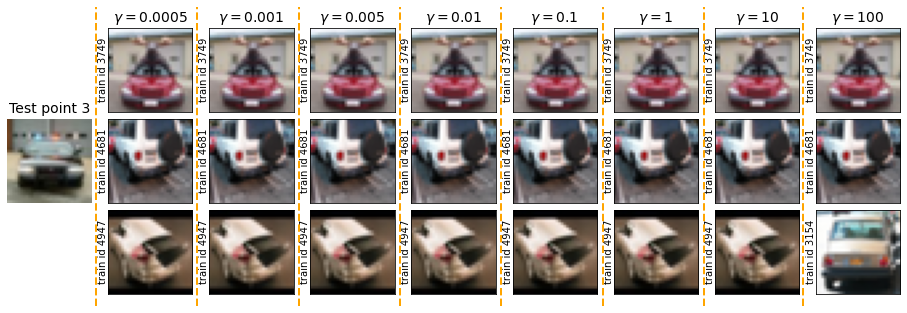

In [88]:
test_point = 3
fig, ax = plt.subplots(3, 9, figsize=(16,5))
idx=1

image = test_data[test_point][0]

for n in range(3):
    ax[n,0].set_xticks(())
    ax[n,0].set_yticks(())
    ax[n,0].axis('off')
ax[1,0].imshow(image)
ax[1,0].set_title('Test point %d'%test_point, fontsize=14)
for weight_matrix_our_new in weight_matrix_ours_new:
    true_class = test_data[test_point][1]
    pos_idx, neg_idx = get_ours_order(weight_matrix_our_new, test_point)
    k = 3
    image = test_data[test_point][0]


    for i in range(k):
        # Positive ones
        our_idx = pos_idx[i]

        ax[i, idx].imshow(train_data[our_idx][0])
        ax[i, idx].set_ylabel('\ntrain id %d' % our_idx, labelpad=0, rotation=90)
        ax[i, idx].set_xticks(())
        ax[i, idx].set_yticks(())
    ax[0, idx].set_title('$\gamma = {}$'.format(lr_list[idx-1]), fontsize=14)

    idx+=1


for x in [0.202,0.29,0.378,0.466,0.554,0.642,0.73,0.816]:
    line = plt.Line2D([x,x],[0.1,0.93],
                      color="orange",linestyle='dashed',linewidth=2)
    fig.add_artist(line)
exp_id = 1

plt.subplots_adjust(wspace=0.2,hspace=0.01)
plt.savefig('figs/img_lr_effects.pdf',bbox_inches='tight', dpi=200)

